# Practical Machine Learning for Physicists
## Policy Gradient

In this notebook we will introduce the policy gradient algorithm for learning the best policies to follow. So here we directly parameterise our policy in terms of some parameters $\theta$.
$$ \pi_{\theta}(s,a) = \mathbb{P}\left[a | s, \theta\right] $$


### Policy Objective Function
Then we define some policy objective function $J(\theta)$ which is a scalar measure of the policy performance. This could be either the *start value* (for step-wise problems) or the *average value* or the *average return*, these are (resepectively):
$$J(\theta)=J_1(\theta) = V_{\pi_\theta}(s_1)=\mathbb{E}[v_1]$$
$$J_{\text{avV}}(\theta) = \sum_s d_{\pi_\theta}(s) V_{\pi_\theta}(s)$$
$$J_{\text{avR}}(\theta) = \sum_s d_{\pi_\theta}(s) \sum_a \pi_{\theta}(s,a) \mathcal{R}_{s,a}$$
where $d_{\pi_\theta}(s)$ is the stationary distribution of Markov chains (i.e. it is the distribution of paths that can be followed).

### Policy Update
We will use gradient descent to update our $theta$
$$\theta_{t+1}=\theta_t + \alpha \nabla_\theta J(\theta_t)$$

### Score Function
Let’s assume our policy $\pi_\theta (s,a)$ is differentiable and we know the gradient $\nabla_\theta \pi_\theta(s,a)$. Then we can write
$$\nabla_\theta \pi_\theta(s,a) = \pi_\theta(s,a) \frac{\nabla_\theta \pi_\theta(s,a)}{\pi_\theta(s,a)}$$
$$\nabla_\theta \pi_\theta(s,a)= \pi_\theta(s,a) \nabla_\theta \log \pi_\theta(s,a)$$

The *score function* is defined as $\nabla_\theta \log \pi_\theta(s,a)$

## Policy Gradient Theorem
For any differentiable policy $\pi_\theta (s,a)$ the policy gradient is given by
$$\nabla_\theta J(\theta) = \mathbb{E}_{\pi_\theta} \left[ \nabla_\theta \log \pi_\theta (s,a) Q_{\pi_\theta}(s,a)\right]$$

## Reward Baseline
Let's rewrite that last but instead subtract off a baseline value $B(s)$ from the reward in the policy gradient.
$$\mathbb{E}_{\pi_\theta} \left[ \nabla_\theta \log \pi_\theta (s,a) B(s) \right] =  \sum_s d_{\pi_\theta}(s) \sum_a \nabla_\theta \pi_{\theta}(s,a) B(s)$$
$$ = \sum_s d_{\pi_\theta}(s) B(s) \nabla_\theta \sum_a \pi_{\theta}(s,a)$$
But $\sum_a \pi_{\theta}(s,a)=1$ and $\nabla_\theta (1)=0$ so
$$\mathbb{E}_{\pi_\theta} \left[ \nabla_\theta \log \pi_\theta (s,a) B(s) \right] = 0$$

Okay so we can subtract off a baseline, but why would we want. Because we can reduce the variance!
Let's define
$$X_k = (R -b_k) G_k$$
where $R=Q_{\pi_\theta}(s,a)$, $b_k=B(s)$ and $G_k=\nabla_\theta \log \pi_\theta (s,a)$.

Now the variance of $X_k$ is
$$\textrm{Var}[X_k]=\mathbb{E}[X^2_k] - \mathbb{E}[X]^2$$
we want to find the baseline that makes this a minimum so we want to set
$$\frac{\partial \textrm{Var}[X_k]}{\partial b_k}=0$$

The baseline that will achieve this is
$$ b_k = \frac{\mathbb{E}[G^2_k R]}{\mathbb{E}[G^2_k]}$$

## Example 1: Up is good
Let's define a simple environment where up is good. The return is given by the final position (e.g. the height) and obviously the optimal strategy would be to go up always.

Now we can define a policy
$$\pi_\theta(\text{up})= \frac{1}{1+e^{-\theta}}$$
and obviously
$$\pi_\theta(\text{down})= 1 - \pi_\theta(\text{up}) $$

Let $x$ denote vertical position and define the return to simply be $\mathcal{R}(t)=x(t)$

Now we can calculate $\nabla_\theta J(\theta)$:
$$\nabla_\theta J(\theta) = \sum_t \left[ \nabla_\theta \log \pi_\theta (a_t) R(t)\right]$$

Now 
$$ \nabla_\theta \log \pi_\theta (a_t) = \frac{\partial \log \pi_\theta (a_t)}{\partial \theta} $$
$$  \frac{\partial \log \pi_\theta (\text{up})}{\partial \theta} =  \frac{\partial \log \left( \frac{1}{1+e^{-\theta}}\right)}{\partial \theta}$$
$$  \frac{\partial \log \pi_\theta (\text{up})}{\partial \theta} = \frac{e^{-\theta}}{1+e^{-\theta}} = e^{-\theta}  \pi_\theta (\text{up}) = 1 -\pi_\theta (\text{up}) $$
$$  \frac{\partial \log \pi_\theta (\text{down})}{\partial \theta} =  -e^{-\theta}  \pi_\theta (\text{down}) = -(1-\pi_\theta (\text{down})) =   -\pi_\theta (\text{up})$$
which gives
$$ \sum_t \nabla_\theta \log \pi_\theta (a_t)  = N_{\text{up}} - N \pi_\theta (\text{up}) = N_{\text{up}} - \bar{N}_{\text{up}} $$

The return is given by how many net up-steps we have taken
$$ R=x(T)=N_{\text{up}}  - N_{\text{down}}  = 2 N_{\text{up}} -N $$

Putting the two together gives:
$$\nabla_\theta J(\theta) = 2 \mathbb{E} \left[( N_{\text{up}} - \frac{N}{2})( N_{\text{up}}-\bar{ N}_{\text{up}}) \right]$$

We can simplify this a little
$$\nabla_\theta J(\theta) = 2 \mathbb{E} \left[ \left( (N_{\text{up}} - \bar{ N}_{\text{up}}) + (\bar{ N}_{\text{up}} - \frac{N}{2}) \right) (N_{\text{up}} - \bar{ N}_{\text{up}}) \right] $$

$$ =2 \mathrm{Var} \left[N_{\text{up}} \right] + 2(\bar{ N}_{\text{up}} - \frac{N}{2}) \mathbb{E}\left[N_{\text{up}} - \bar{ N}_{\text{up}}\right]$$
Now the last term vanishes as
$$\mathbb{E}\left[N_{\text{up}} - \bar{ N}_{\text{up}}\right] = \mathbb{E}\left[N_{\text{up}} \right] - \mathbb{E}\left[\bar{ N}_{\text{up}}\right] $$
So
$$= 2 \mathrm{Var} \left[N_{\text{up}} \right] = 2N \pi_\theta (\text{up}) (1 - \pi_\theta (\text{up})) $$



In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['figure.dpi']=300 # highres display

Text(0, 0.5, '$P(up)$')

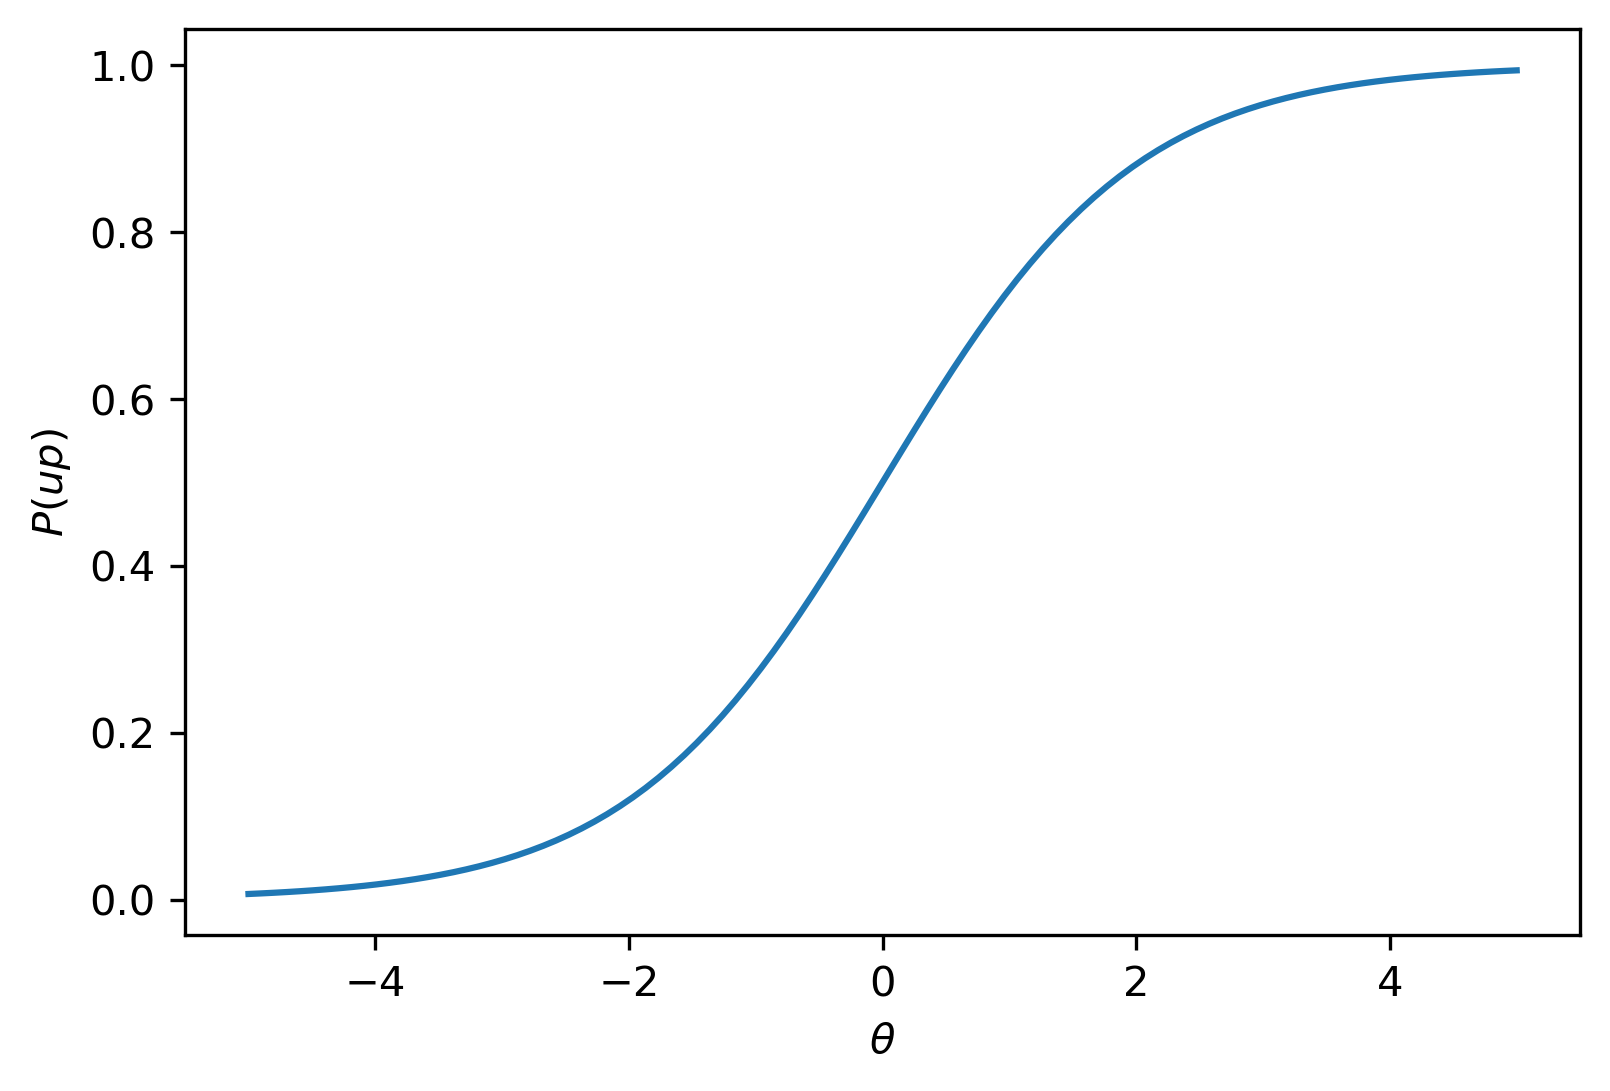

In [12]:
#Define probability for going up
def probUp(theta):
    return(1./(1+np.exp(-theta)))


thetaArr=np.linspace(-5,5,100)
fig,ax=plt.subplots()
ax.plot(thetaArr,probUp(thetaArr))
ax.set_xlabel(r"$\theta$")
ax.set_ylabel("$P(up)$")

#### Random Walk


Text(0.5, 1.0, '$\\theta=$0 Reward')

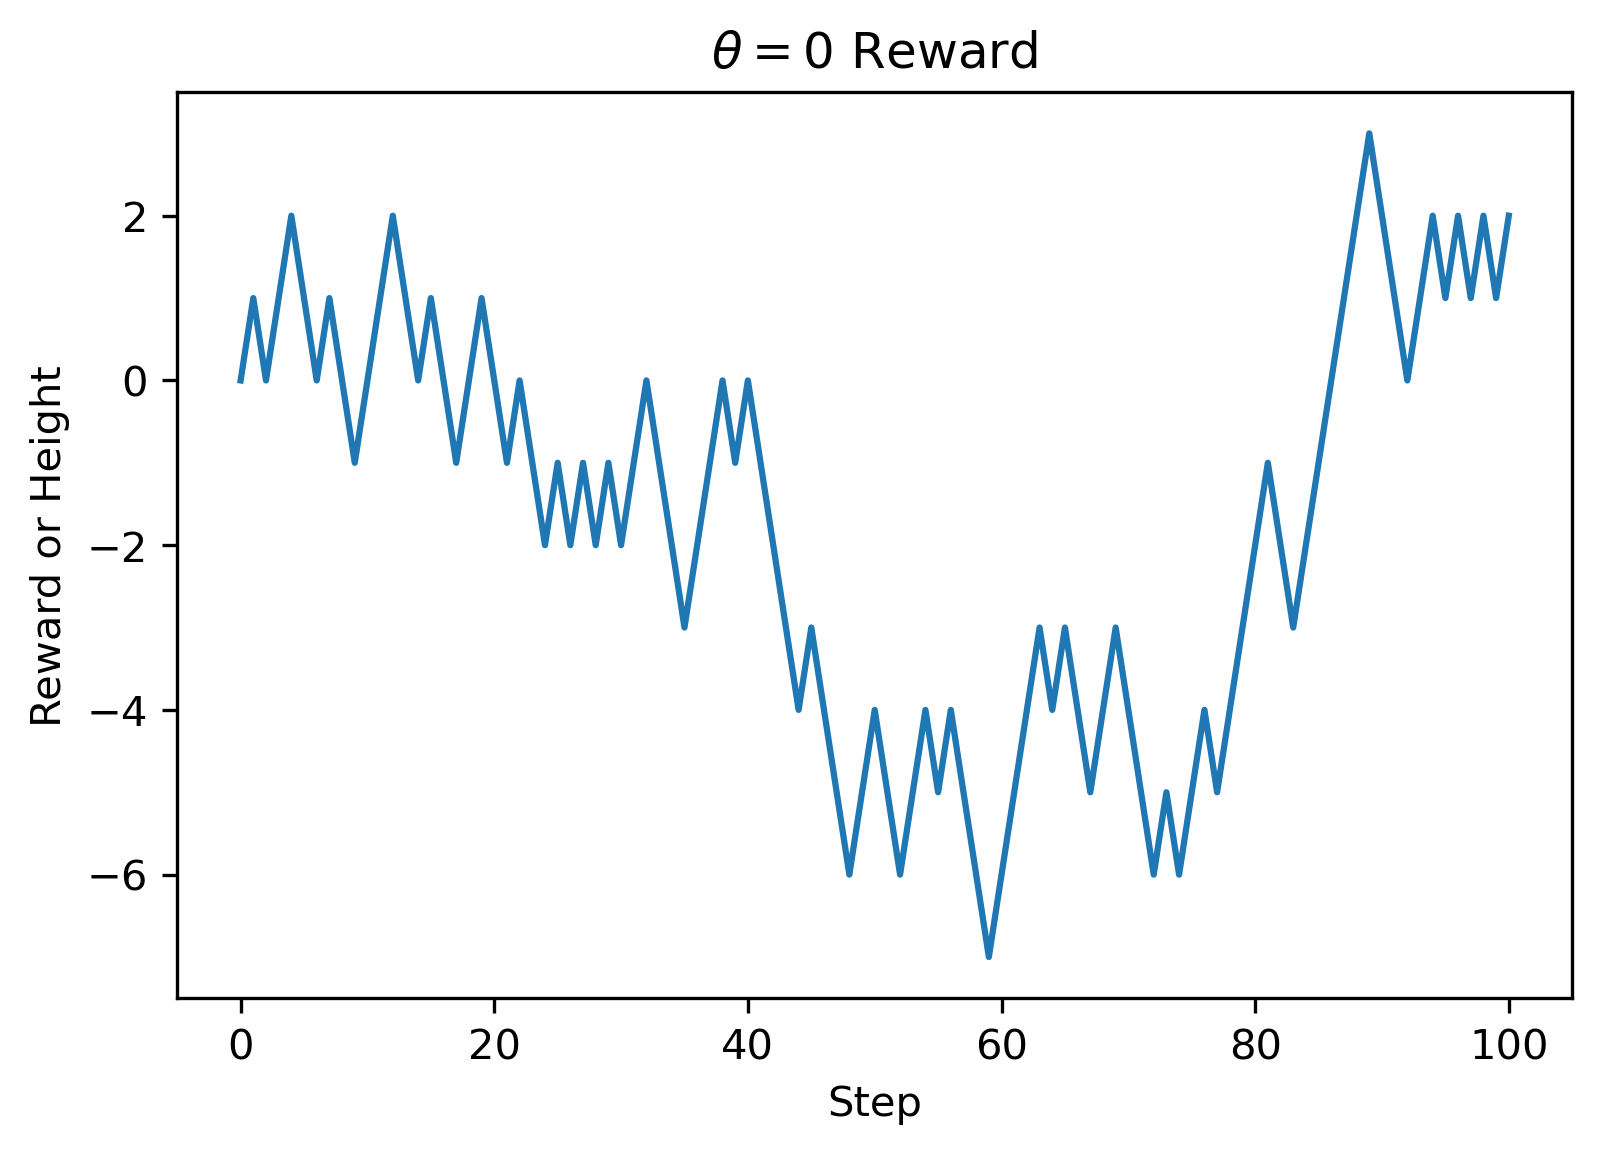

In [40]:
theta=0  #Starting theta
steps=100  #Number of steps in random walk
x=0 # Starting height
randArr=np.random.rand(steps)  #Generate random numbers between 0-1
boolArr=randArr>probUp(theta)  #Compare to the probUp probability
stepArr=2*(boolArr-0.5) #Convert the boolArray into and array of -1 and +1
xArr=np.append([0],np.cumsum(stepArr)) #Find the cumulative sum (and add a zero for the start)

fig,ax=plt.subplots()
ax.plot(np.arange(steps+1),xArr)  # Plot steps vs cumulative sum
ax.set_xlabel("Step")
ax.set_ylabel("Reward or Height")
ax.set_title(r"$\theta=$"+str(theta)+" Reward")


## Training for a better $\theta$  -- No Baseline


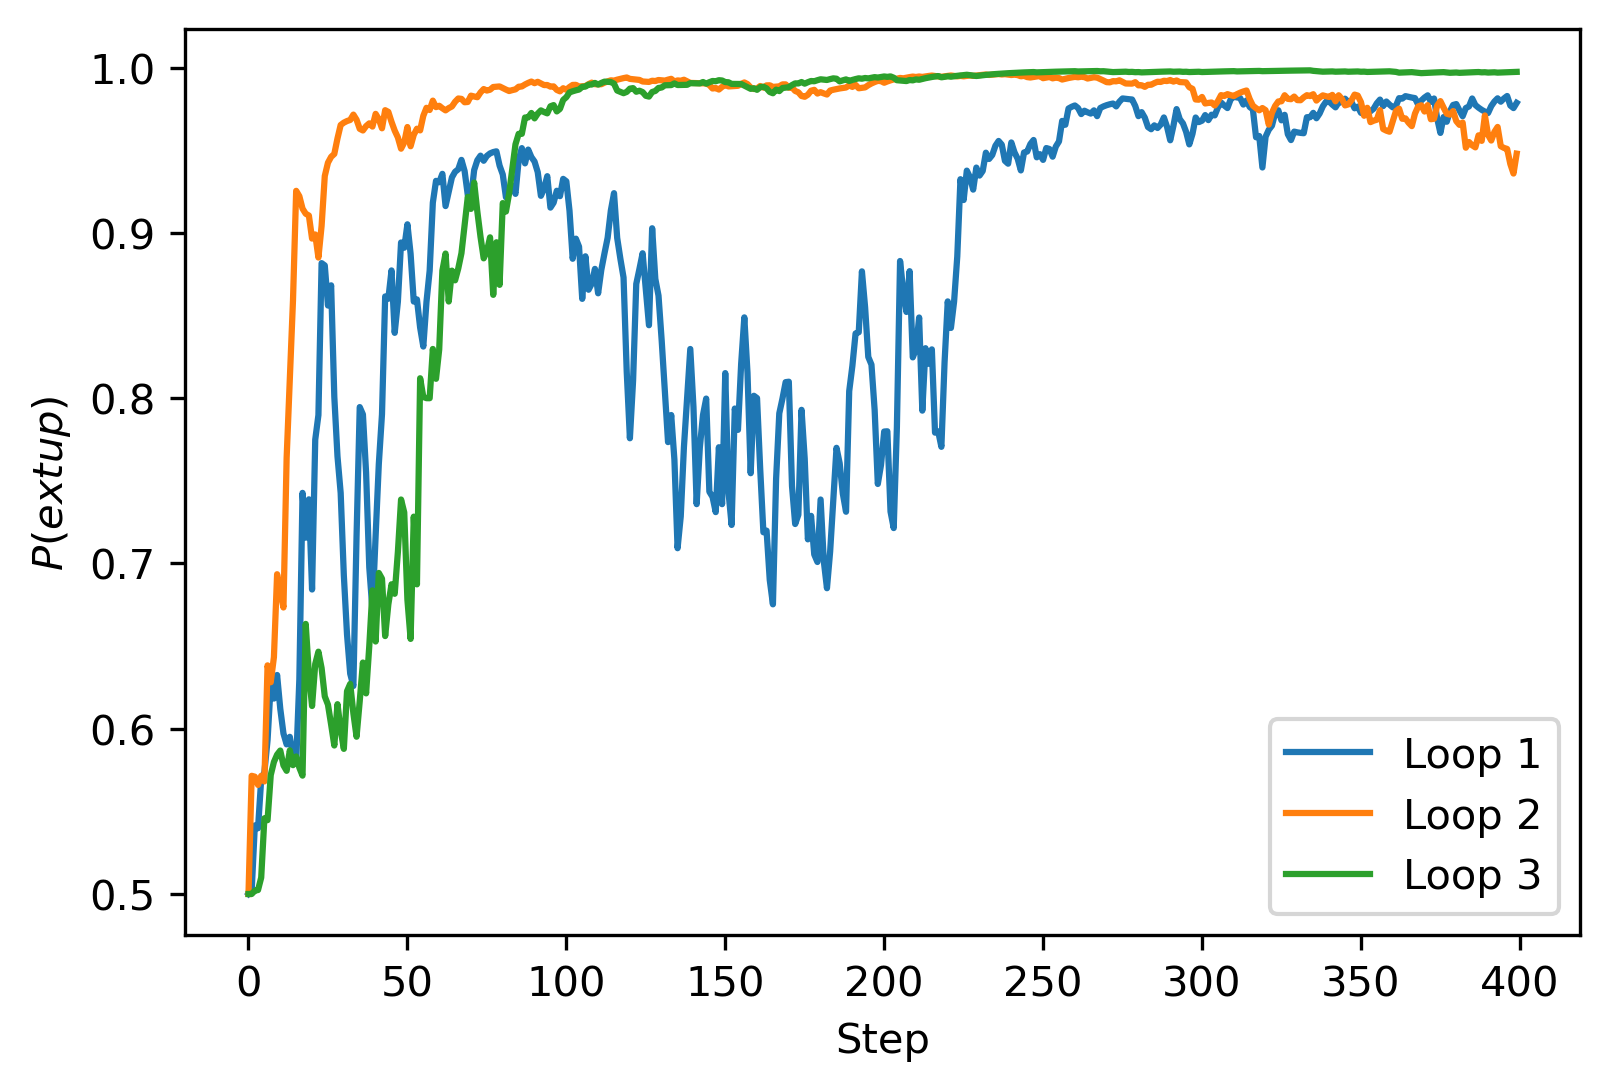

In [147]:
theta0=0  #Initial theta
N=100  #Num points per step
eta=0.001  #Learning rate
steps=400  #Num steps in pot

fg,ax=plt.subplots()  #Get plot
stepArr=np.arange(steps) #The numbers 0, steps-1

for loop in range(3):  #Do three separate loops
    probArr=np.zeros(steps) # Get probArray filled with zeros
    theta=theta0  # Set initial theta at the start of teh step
    for i in range(steps):  #Loop over the steps
        pup=probUp(theta)   #Get probability for up step
        nup=np.random.binomial(N,pup) #Random number of up steps
        nbar=N*pup  #Get expected number of up steps
        update=2*(nup-N/2)*(nup-nbar)  #The update amount
        theta=theta+eta*update # Do the update
        probArr[i]=pup #Save for plotting
    ax.plot(stepArr,probArr,label="Loop "+str(loop+1))
        
ax.set_xlabel("Step")
ax.set_ylabel("$P(\text{up})$")
ax.legend()

As you can see from above there are large variations in the convergence rate. 

Now each setp our update is (ignoring the learning rate and the factor of 2):
$$X = \left(N_{\text{up}} -\frac{N}{2}\right) \left(N_{\text{up}} - \bar{N}_{\text{up}} \right)$$

So let's introudce a new variable $Y = N_{\text{up}} - \bar{N}_{\text{up}}$ and a constant $c=\bar{N}_{\text{up}} -\frac{N}{2}$
which let's us write
$$ X = \left(Y+c\right)Y$$
The advantage of $Y$ is that it is zero-meaned and we can use the higher central moments of binomial distribution to determine the mean and variance:
- Mean: 0
- Variance (2nd moment) $\mu_2 = N p (1 -p)$ 
- 3rd moment $\mu_3 = N p (1 -p) (1 - 2p) $
- Variance of variance (4th moment) $\mu_4 = N p (1 -p) \left[3 p^2(2-N) + 3p(N-2) +1 \right]$

Expectation value of $X$,
$$\mathbb{E}[X] = \mathbb{E}[Y^2] + c \mathbb{E}[Y]= \mathbb{E}[Y^2]$$

Variance of $X$
$$\mathrm{Var}[X] = \mathbb{E}[X^2] - \mathbb{E}[X]^2$$
$$\mathrm{Var}[X] = \mathbb{E}[Y^4] + 2 c \mathbb{E}[Y^3] + c^2 \mathbb{E}[Y^2] - \mathbb{E}[Y^2]^2$$


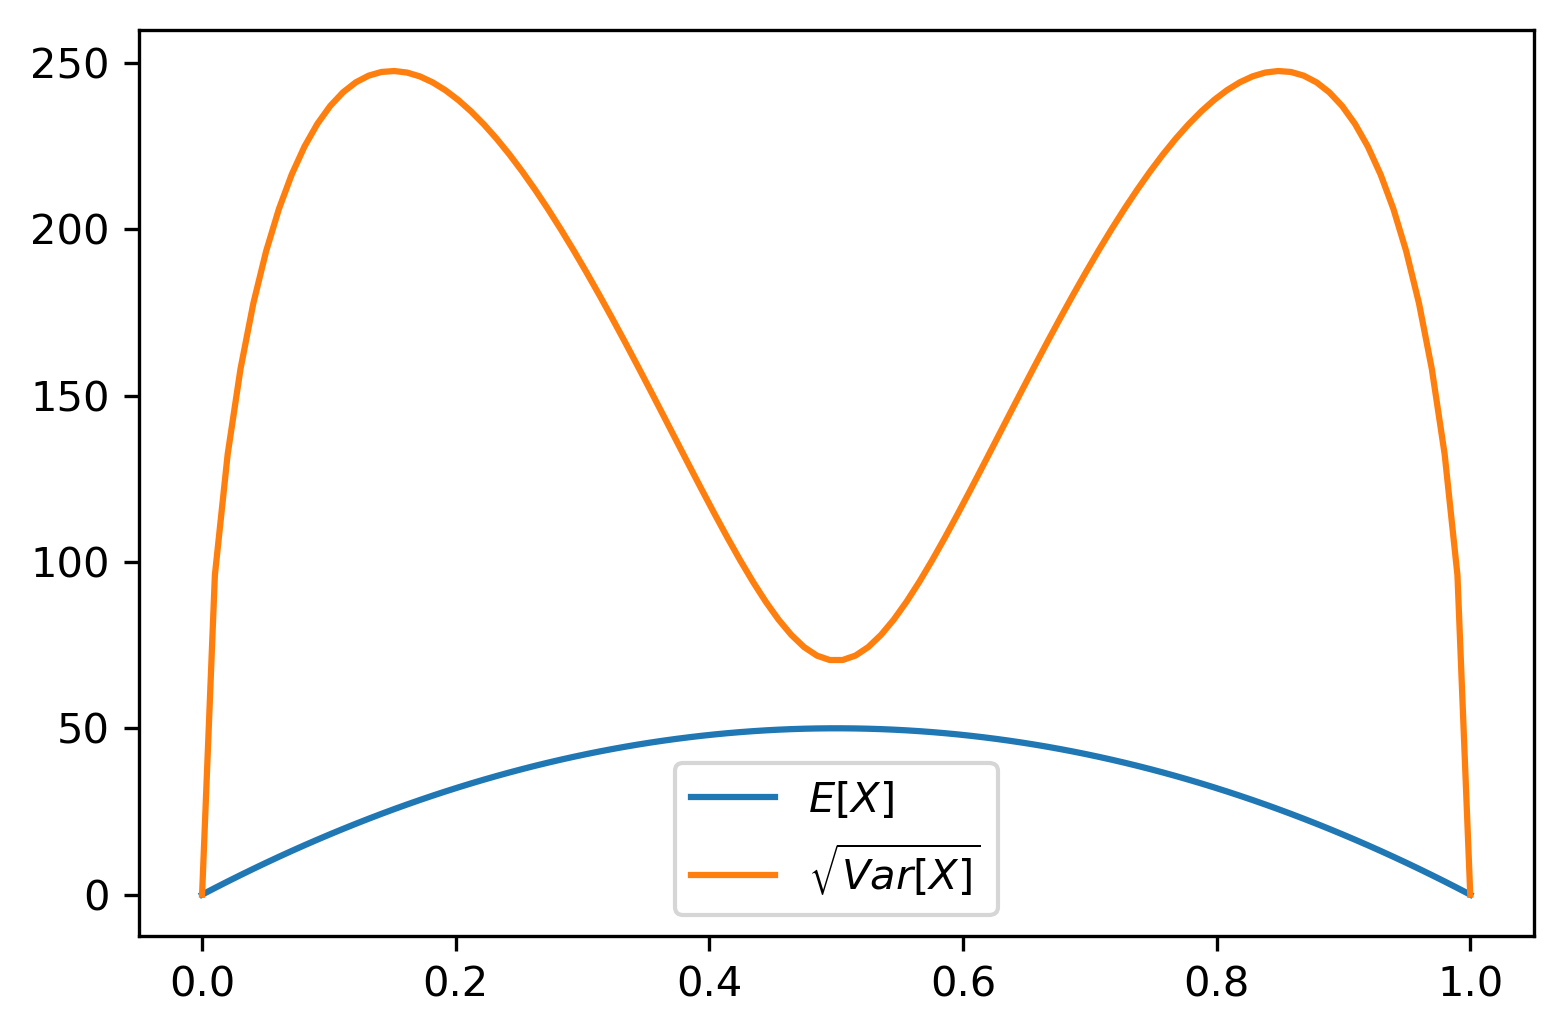

In [143]:
N=100
p=np.linspace(0,1,100)
c=p*N-0.5*N
mu2Arr=N*p*(1-p)
mu3Arr=N*p*(1-p)*(1-2*p)
mu4Arr=N*p*(1-p)*(1+(3*N-6)*p*(1-p))
ExArr=mu2Arr
VarArr=mu4Arr+2*c*mu3Arr+c*c*mu2Arr -mu2Arr*mu2Arr
fig,ax=plt.subplots()
ax.plot(p,2*ExArr,label="$E[X]$")
ax.plot(p,2*np.sqrt(VarArr),label="$\sqrt{{Var}[X]}$")
ax.legend()

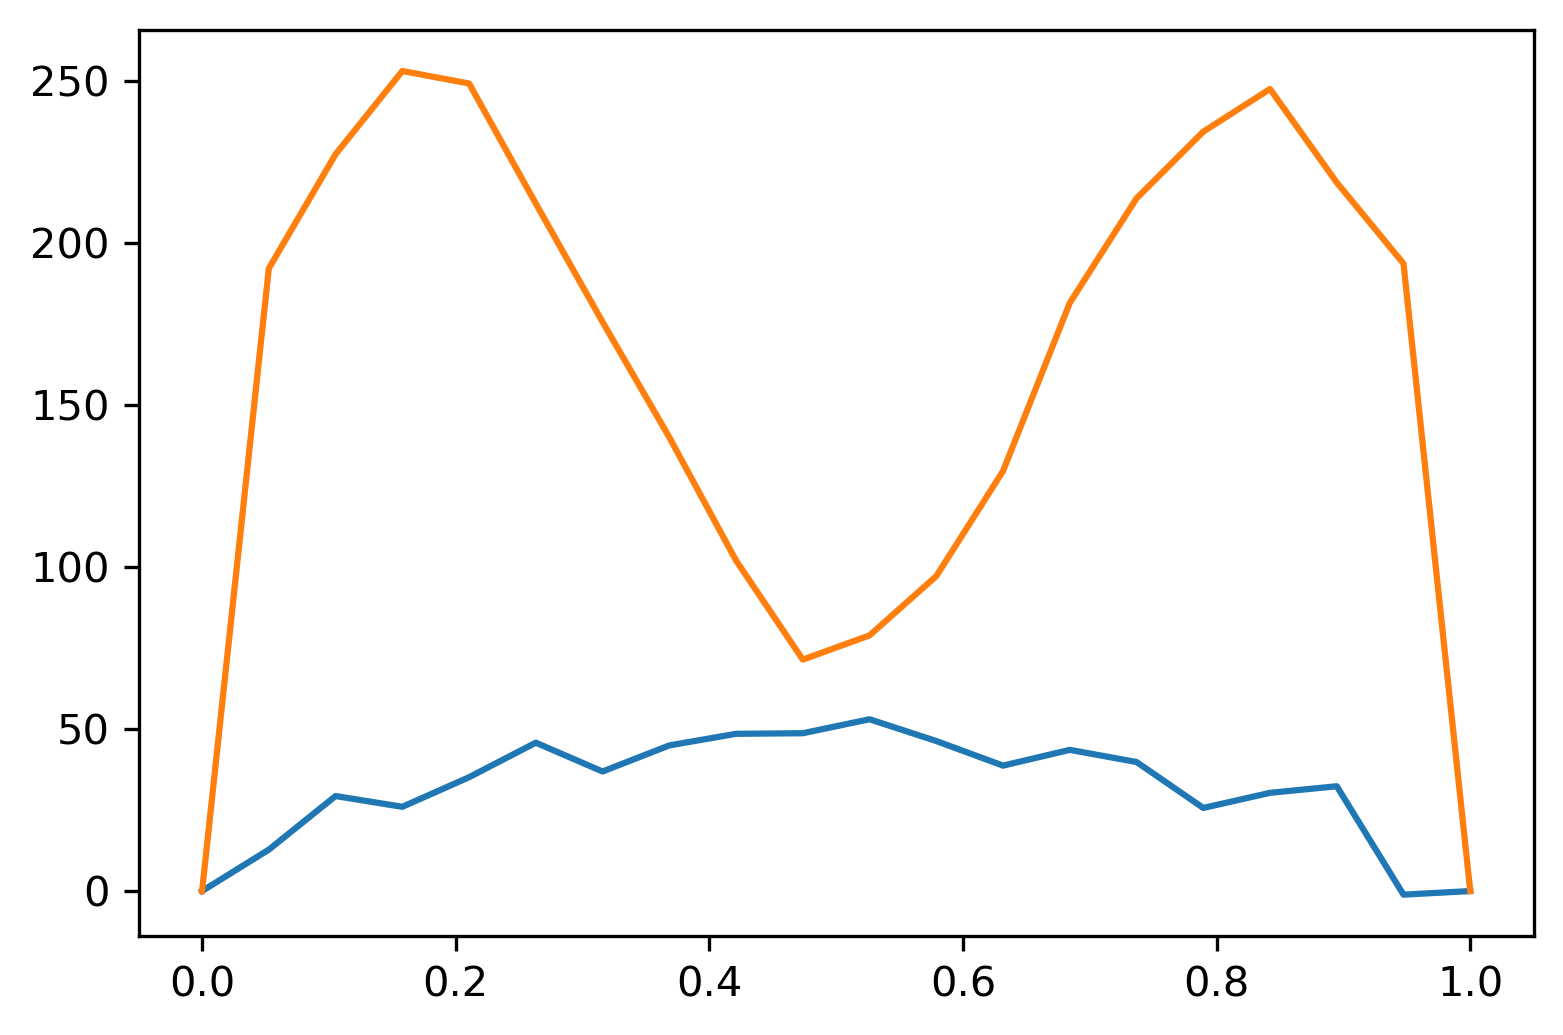

In [148]:
#Let's verfiy that is what we see the brute force way
N=100
steps=1000
tsteps=20
pupArr=np.zeros(tsteps)
meanArr=np.zeros(tsteps)
stdArr=np.zeros(tsteps)
thetaArr=np.linspace(-3,3,tsteps)


ti=0
for pup in np.linspace(0,1,tsteps):
    nbar=N*pup
    pupArr[ti]=pup
    updates=np.zeros(steps)
    for i in range(steps):    
        nup=np.random.binomial(N,pup)
        updates[i]=2*(nup-N/2)*(nup-nbar)
    meanArr[ti]=(np.mean(updates))
    stdArr[ti]=np.std(updates)
    ti+=1
    
fig,ax=plt.subplots()
ax.plot(pupArr,meanArr)
ax.plot(pupArr,stdArr)


## Optimal reward baseline subtraction
Let's form a new update statistic $X^\prime$ where we subtract off the optimal baseline
$$X^\prime = \left(Y+c-b\right)Y$$
where
$$ b = \frac{\mathbb{E}\left[Y^2 (Y+c) \right]}{\mathbb{E}\left[Y^2 \right]}$$

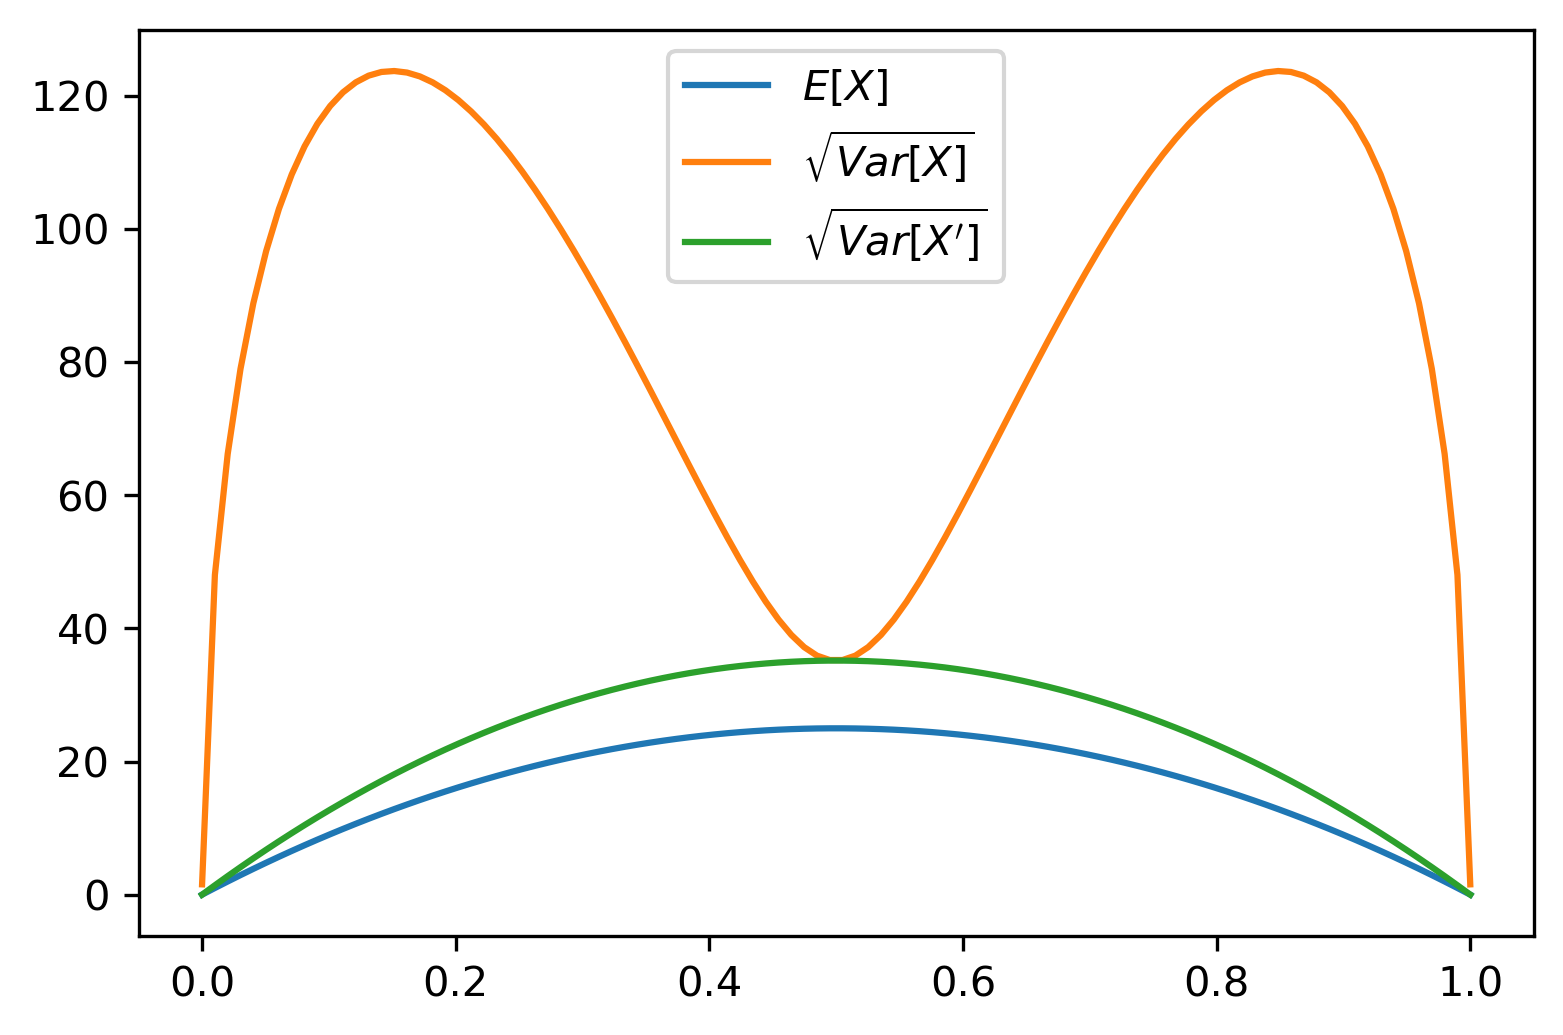

In [151]:
N=100
p=np.linspace(1e-5,1-1e-5,100)
c=p*N-0.5*N
mu2Arr=N*p*(1-p)
mu3Arr=N*p*(1-p)*(1-2*p)
mu4Arr=N*p*(1-p)*(1+(3*N-6)*p*(1-p))
b=(mu3Arr+c*mu2Arr)/mu2Arr
ExArr=mu2Arr
VarArr=mu4Arr+2*c*mu3Arr+c*c*mu2Arr -mu2Arr*mu2Arr
VarPrimeArr=mu4Arr+2*(c-b)*mu3Arr+(c-b)*(c-b)*mu2Arr -mu2Arr*mu2Arr
fig,ax=plt.subplots()
ax.plot(p,ExArr,label="$E[X]$")
ax.plot(p,np.sqrt(VarArr),label="$\sqrt{{Var}[X]}$")
ax.plot(p,np.sqrt(VarPrimeArr),label="$\sqrt{{Var}[X^\prime]}$")
ax.legend()

# Suggested tasks
1. Implement the optimal baseline improvement in our training for a better theta above, does the algorithm with the optimal baseline converge quicker than the no-baseline results shown above.
2. Use a different reward function, can you find the optimal baseline if the reward is different?